In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
df = pd.read_csv('UTSEUS-anjuke-real-estate-baoshan.csv')

In [50]:
df = df.drop(['id','address','tags','done','district','neighborhood'],axis=1)
#df.head()

In [51]:
df = df[(df['price']<20000000)];

In [52]:
X = df[['longitude','latitude','bedroom','room','surface']]
Y = df['onesquaremeter']

In [53]:
#plt.hist(Y,100)

In [54]:
np.median(Y)

46250.0

In [71]:
Z = pd.DataFrame.copy(Y)
Z[Y <= np.quantile(Y, 0.25)] = 0
Z[(Y > np.quantile(Y, 0.25)) & (Y <= np.quantile(Y,0.5))] = 1
Z[(Y > np.quantile(Y, 0.5)) & (Y <= np.quantile(Y,0.75))] = 2
Z[Y > np.quantile(Y, 0.75)] = 3

In [56]:
"""
Z = pd.DataFrame.copy(Y)
Z[Y <= 20000] = 'Very Cheap'
Z[(Y>20000) & (Y<=40000)]= 'Cheap'
Z[(Y>40000) & (Y<=55000)]= 'Normal'
Z[(Y>55000) & (Y<=65000)]= 'Expensive'
Z[Y > 65000] = 'Very Expensive'
"""

"\nZ = pd.DataFrame.copy(Y)\nZ[Y <= 20000] = 'Very Cheap'\nZ[(Y>20000) & (Y<=40000)]= 'Cheap'\nZ[(Y>40000) & (Y<=55000)]= 'Normal'\nZ[(Y>55000) & (Y<=65000)]= 'Expensive'\nZ[Y > 65000] = 'Very Expensive'\n"

In [57]:
Z

0            Very Cheap
1             Expensive
2        Very Expensive
3        Very Expensive
4             Expensive
5             Expensive
6            Very Cheap
7        Very Expensive
8                 Cheap
9        Very Expensive
10       Very Expensive
11       Very Expensive
12           Very Cheap
13           Very Cheap
14       Very Expensive
15       Very Expensive
16       Very Expensive
17       Very Expensive
18                Cheap
19       Very Expensive
20       Very Expensive
21       Very Expensive
22       Very Expensive
23            Expensive
24                Cheap
25            Expensive
26                Cheap
27       Very Expensive
28            Expensive
29                Cheap
              ...      
34386    Very Expensive
34387         Expensive
34388        Very Cheap
34389             Cheap
34390         Expensive
34391         Expensive
34392    Very Expensive
34393         Expensive
34394         Expensive
34395         Expensive
34396         Ex

### AdaBoost

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit

In [59]:
clf = AdaBoostClassifier(n_estimators=200)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
scores.mean()

0.6004072134962187

### Support Vecteur Machines

In [37]:
from sklearn import svm

In [39]:
clf = svm.SVC()
clf.fit(X, Z)

C:\Users\sebr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
X_train, Z_train = X[0:20000], Z[0:20000]
X_val, Z_val = X[20000:len(X)], Z[20000:len(Z)]
clf = clf.fit(X_train, Z_train)
Z_pred = clf.predict(X_val)
np.mean(Z_pred == Z_val)

C:\Users\sebr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3289739130434783

### Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, Z)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
X_train, Z_train = X[0:20000], Z[0:20000]
X_val, Z_val = X[20000:len(X)], Z[20000:len(Z)]

In [31]:
clf = clf.fit(X_train, Z_train)

In [32]:
Z_pred = clf.predict(X_val)

In [33]:
np.mean(Z_pred == Z_val)

0.14845217391304347

### Decision Tree

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Z)

In [19]:
X_train, Z_train = X[0:20000], Z[0:20000]
X_val, Z_val = X[20000:len(X)], Z[20000:len(Z)]

In [20]:
clf = clf.fit(X_train, Z_train)

In [21]:
Z_pred = clf.predict(X_val)

In [31]:
np.mean(Z_pred == Z_val)

0.35582608695652174

### Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth = 2)
scores = cross_val_score(clf, X, Z, cv=5)
np.mean(scores)

0.3795752443343294

[Text(167.4, 181.2, 'X[1] <= 31.348\nentropy = 0.75\nsamples = 34375\nvalue = [8595, 8595, 8594, 8591]'),
 Text(83.7, 108.72, 'X[1] <= 31.292\nentropy = 0.654\nsamples = 16380\nvalue = [2602, 5495, 859, 7424]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.372\nsamples = 3187\nvalue = [138, 341, 220, 2488]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.67\nsamples = 13193\nvalue = [2464, 5154, 639, 4936]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 31.411\nentropy = 0.67\nsamples = 17995\nvalue = [5993, 3100, 7735, 1167]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.696\nsamples = 13949\nvalue = [5597, 3012, 4184, 1156]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.22\nsamples = 4046\nvalue = [396, 88, 3551, 11]')]

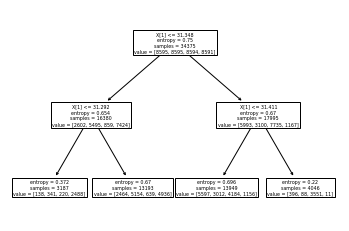

In [61]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X, Z)
tree.plot_tree(clf)

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, Z)
scores = cross_val_score(clf, X, Z, cv=5)
np.mean(scores)

0.4936141900780691

### GridSearch

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
param_grid = {'max_depth': [18, 19, 20, 21, 22, 23, 24,25,26,27]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=ShuffleSplit(n_splits=5))
search.fit(X, Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [18, 19, 2

In [81]:
search.best_estimator_
search.best_params_

{'max_depth': 26}

In [65]:
clf = tree.DecisionTreeClassifier(max_depth=26)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.7645142524723678

### Near Neighbors

In [66]:
from sklearn import neighbors, datasets

In [67]:
n_neighbors = 2000

In [68]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
scores = cross_val_score(clf, X, Z, cv=5)
clf.fit(X, Z)
np.mean(scores)

0.4850886787717779

In [44]:
Z = clf.predict

## Regression

#### Decision Tree

In [72]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Z)

In [75]:
X_train, Z_train = X[0:30000], Z[0:30000]
X_val, Z_val = X[30000:len(X)], Z[30000:len(Z)]
clf = clf.fit(X_train, Z_train)
Z_pred = clf.predict(X_val)
np.mean(Z_pred == Z_val)

0.28365714285714283

#### AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=1000)
regr.fit(X, Z)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=1000, random_state=0)

In [80]:
X_train, Z_train = X[0:30000], Z[0:30000]
X_val, Z_val = X[30000:len(X)], Z[30000:len(Z)]
regr = regr.fit(X_train, Z_train)
Z_pred = regr.predict(X_val)
np.mean(Z_pred == Z_val)

0.0

#### Random Forest

In [ ]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression